In [1]:
# Imports:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn.metrics import silhouette_score
import numpy as np

# 1. Data

In [2]:
# a.  Load CC General.csv into a pandas DataFrame and print the header. 
#     Use pandas.DataFrame.describe to summarize the data. 

data = pd.read_csv("C:/Users/miche/Downloads/CC GENERAL.csv")

display(data.head())
display(data.describe())
display(data.shape)

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 89.000000      0.000000             0.500000   
75%                468.637500   1113.821139             0.916667   
max              22500.000000  47137.211760             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 8950.000000                       8950.000000   
mean                     0.202458                          0.364437   
std                      0.298336                          0.397448   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.300000                          0.750000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             8950.000000       8950.000000    8950.000000   8949.000000   
mean                 0.135144          3.248827      14.709832   4494.449450   
std                  0.200121          6.824647      24.857649   3638.815725   
min                  0.000000          0.000000       0.000000     50.000000   
25%                  0.000000          0.000000       1.000000   1600.000000   
50%                  0.000000          0.000000       7.000000   3000.000000   
75%                  0.222222          4.000000      17.000000   6500.000000   
max                  1.500000        123.000000     358.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count   8950.000000       8637.000000       8950.000000  8950.000000  
mean    1733.143852        864.206542          0.153715    11.517318  
std     2895.063757       2372.446607          0.292499     1.338331  
min        0.000000          0.019163          0.000000     6.000000  
25%      383.276166        169.123707          0.000000    12.000000  
50%      856.901546        312.343947          0.000000    12.000000  
75%     1901.134317        825.485459          0.142857    12.000000  
max    50721.483360      76406.207520          1.000000    12.000000

(8950, 18)

In [3]:
# In a Markdown cell, explain the meaning of each column, make observations based on these statistics, 
# and discuss whether they provide useful insights.

**Explanation:**

This dataset provides the features involved in the marketing department of a credit card company. For example, the CUST_ID column is used to identify the customer ID, while the CREDIT_LIMIT column identifies the credit limit of each customer. The rest of the columns represent other details/features of each customer in the company.

The second chart provides detailed descriptions of each column, including the number of values, the average, the standard deviation and other details.

In [4]:
# b.  Use pandas.DataFrame.info to check if the entries are the correct data types and if there are any missing values. 
#     Use pandas.DataFrame.duplicates to check for duplicate entries. 
#     Clean the dataset so there are no missing values, duplicate rows, or incorrect data types. 

display(data.info())
print("Duplicates: \n", data.duplicated().sum())
print("Nulls or Missing: \n", data.isna().sum())

# Clean dataset from missing value rows
data = data.dropna()

# Check whether the action occurred
print("Nulls or Missing: \n", data[["MINIMUM_PAYMENTS", "CREDIT_LIMIT"]].isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
CUST_ID                             8950 non-null object
BALANCE                             8950 non-null float64
BALANCE_FREQUENCY                   8950 non-null float64
PURCHASES                           8950 non-null float64
ONEOFF_PURCHASES                    8950 non-null float64
INSTALLMENTS_PURCHASES              8950 non-null float64
CASH_ADVANCE                        8950 non-null float64
PURCHASES_FREQUENCY                 8950 non-null float64
ONEOFF_PURCHASES_FREQUENCY          8950 non-null float64
PURCHASES_INSTALLMENTS_FREQUENCY    8950 non-null float64
CASH_ADVANCE_FREQUENCY              8950 non-null float64
CASH_ADVANCE_TRX                    8950 non-null int64
PURCHASES_TRX                       8950 non-null int64
CREDIT_LIMIT                        8949 non-null float64
PAYMENTS                            8950 non-null float64
MINIMUM_PAYMENTS            

None

Duplicates: 
 0
Nulls or Missing: 
 CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64
Nulls or Missing: 
 MINIMUM_PAYMENTS    0
CREDIT_LIMIT        0
dtype: int64


In [5]:
# Document the changes and cleaning process in Markdown.

**Explanation:**

After checking the dataset for missing values, duplicates, and incorrect data types, I found that there was 1 missing values in the CREDIT_LIMIT column and 313 missing values in the MINIMUM_PAYMENTS column. Since there are 8950 rows, I decided that it would be best to delete/drop the rows containing the missing values. After doing this, I confirmed that changes had been implemented, and found that this action went through.

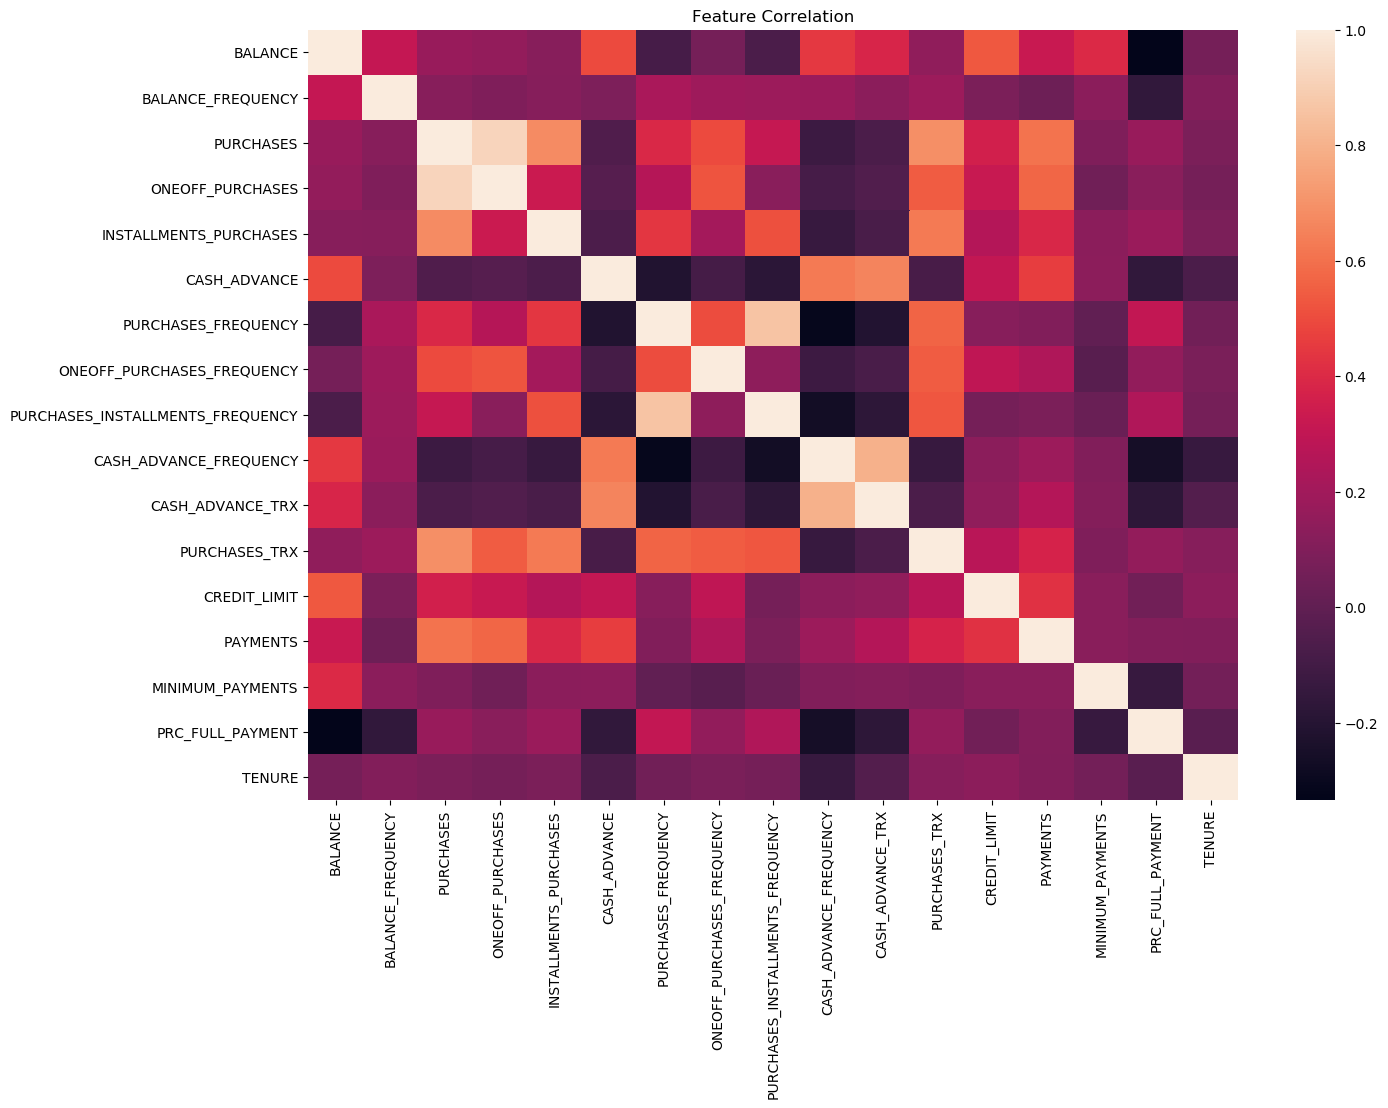

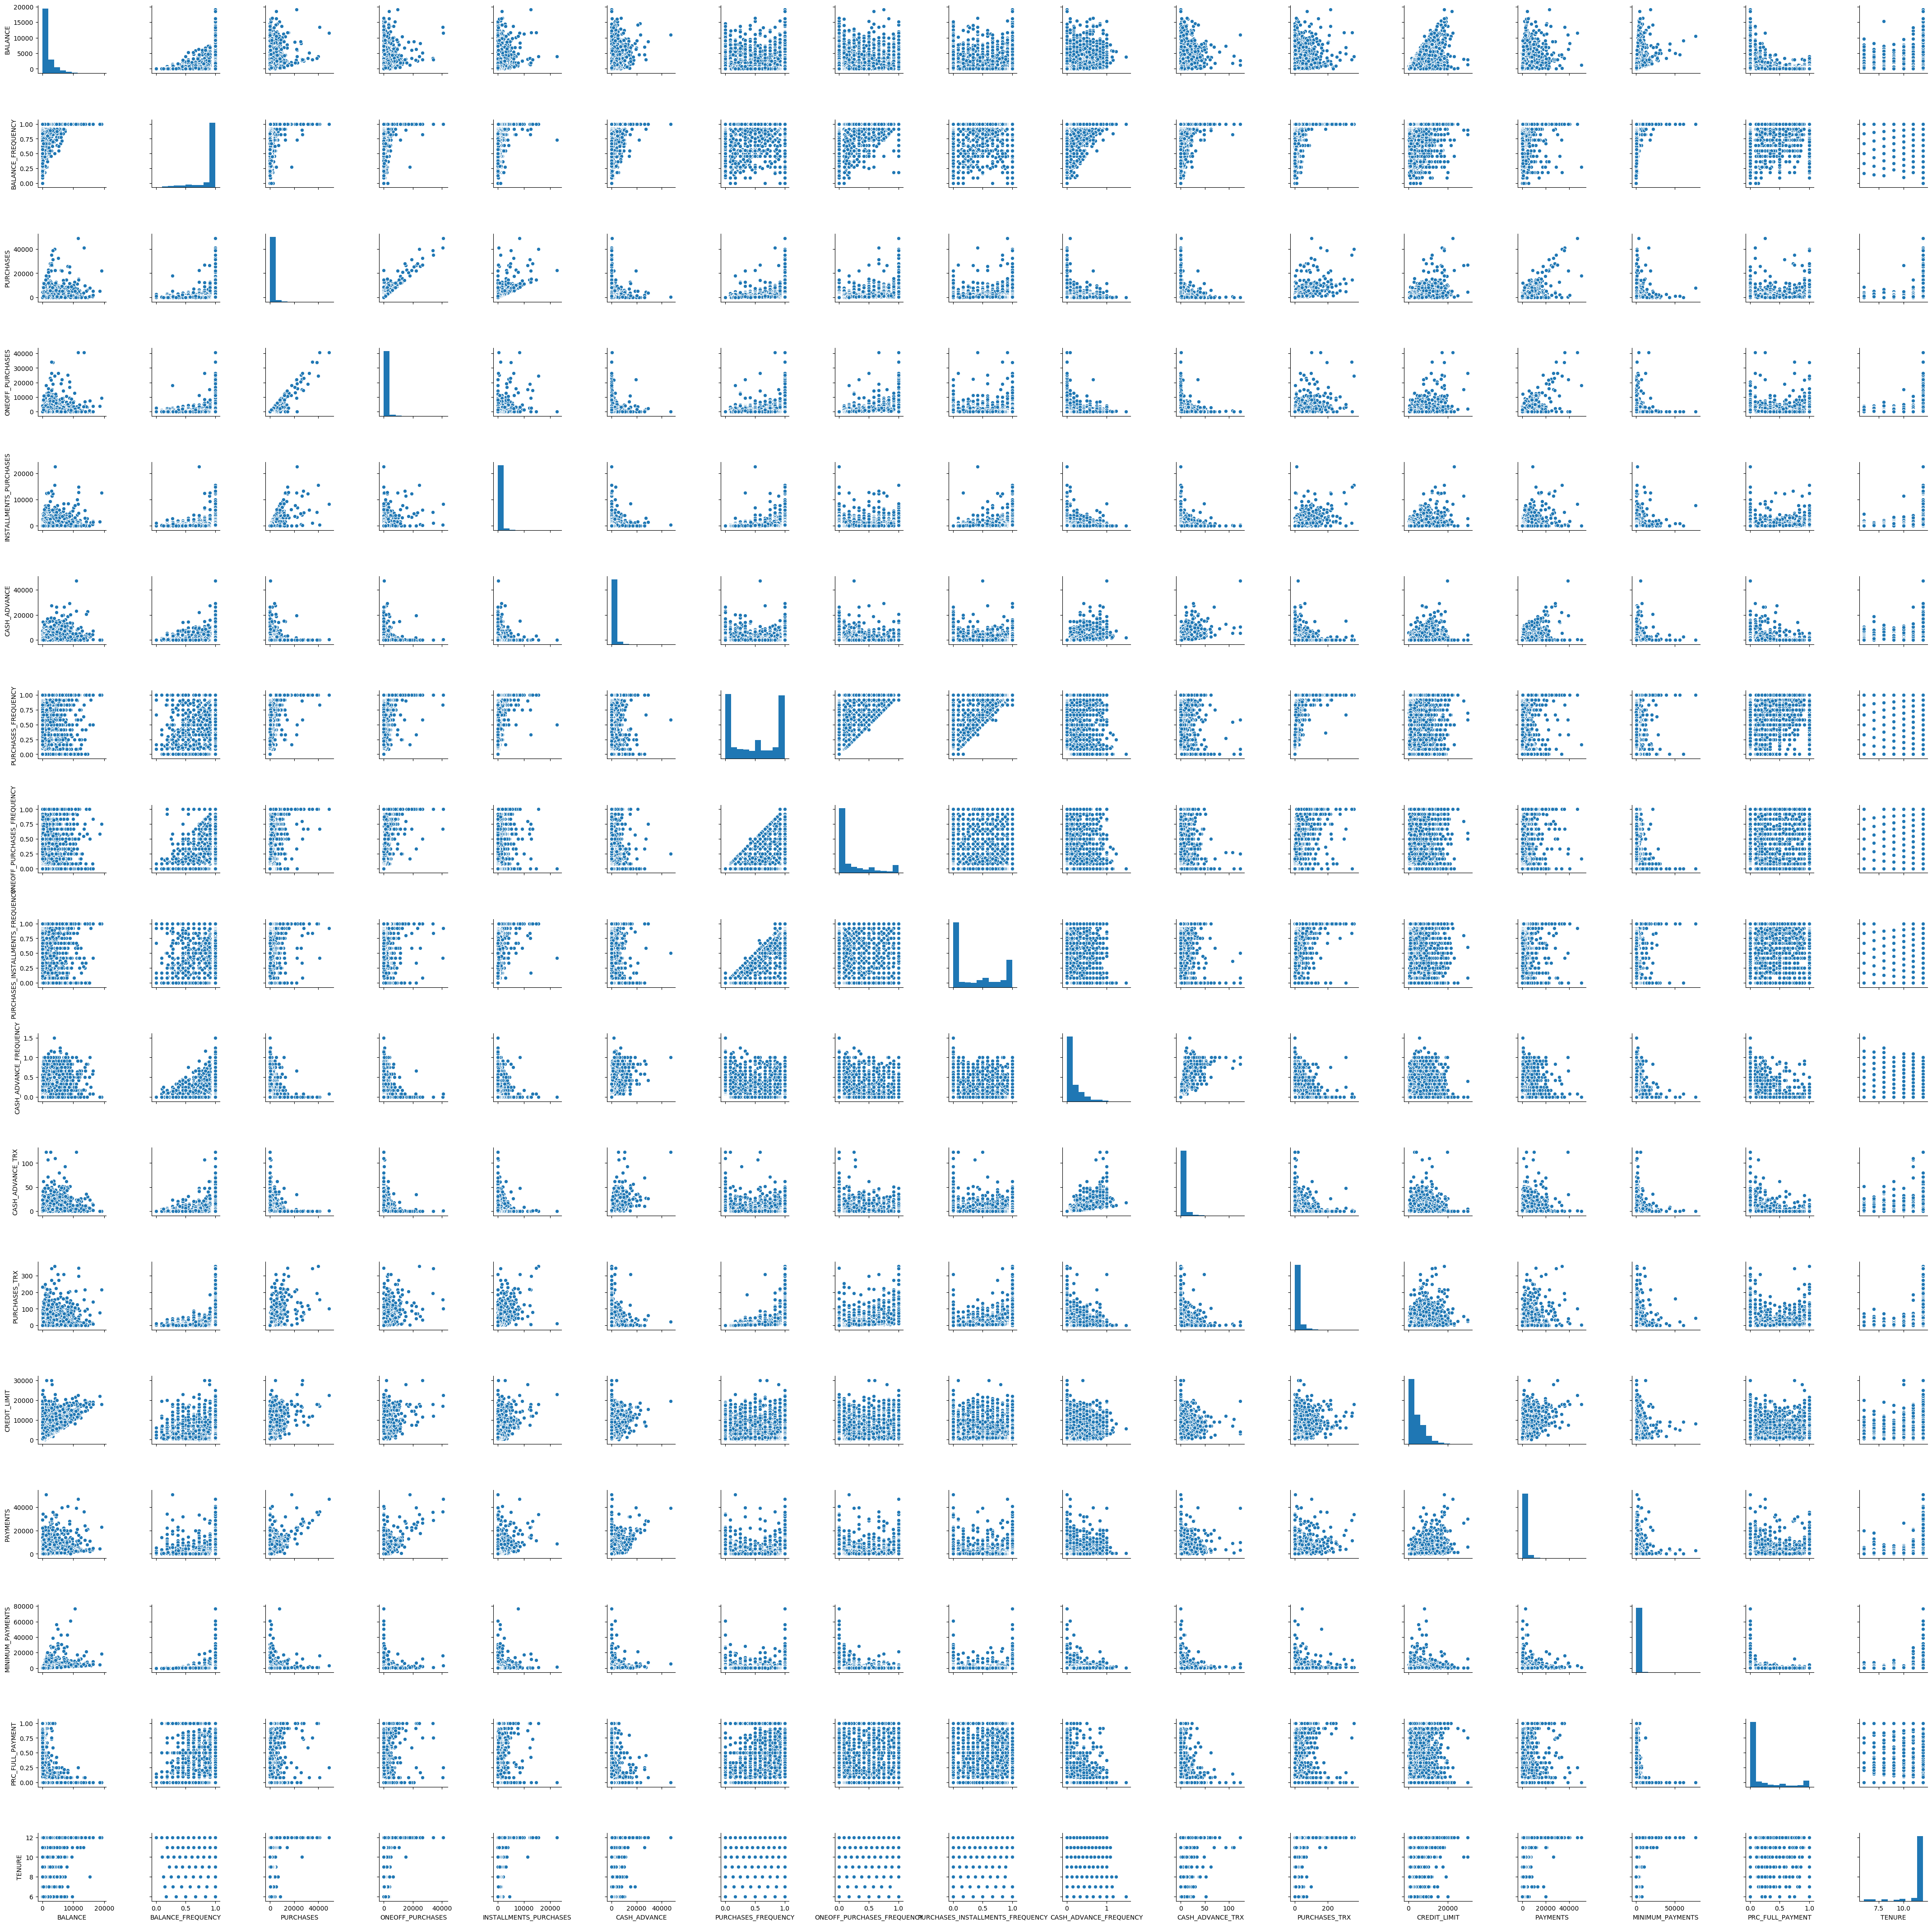

In [6]:
# c.  Drop the 'CUST_ID' column. Use seaborn.heatmap to display the correlation matrix of the features. 
#     Use seaborn.pairplot to generate scatter plots and histograms. 

data = data.drop(columns = ["CUST_ID"])

plt.figure(figsize=(15,10))
sns.heatmap(data.corr())
plt.title("Feature Correlation")
plt.show()

sns.pairplot(data=data)
plt.show()

In [7]:
# Record your observations and discuss the insights gained in Markdown. 

**Explanation:**

Based on the heatmap, I can observe that the columns with a strong positive correlation are as follows:
1. PURCHASES and ONEOFF_PURCHASES,
2. PURCHASES_INSTALLMENTS_FREQUENCY and PURCHASES_FREQUENCY, and
3. CASH_ADVANCE_TRX and CASH_ADVANCE_FREQUENCY

The pairplot confirms these correlations, with columns containing a strong positive correlation having points moving in an angular line towards the top right corner of the plot, while strong negative correlation plots (such as BALANCE and PRC_FULL_PAYMENT) have points moving in an angular line towards the bottom right corner.

# 2. Modeling

In [8]:
# a. Use sklearn.preprocessing.MinMaxScaler to scale the data and print the transformed header. 

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

scaled_df = pd.DataFrame(scaled_data, columns=data.columns)
scaled_df.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  0.002148           0.818182   0.001945          0.000000   
1  0.168169           0.909091   0.000000          0.000000   
2  0.131026           1.000000   0.015766          0.018968   
3  0.042940           1.000000   0.000326          0.000393   
4  0.095038           1.000000   0.027188          0.000000   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                0.004240      0.000000             0.166667   
1                0.000000      0.136685             0.000000   
2                0.000000      0.000000             1.000000   
3                0.000000      0.000000             0.083333   
4                0.059257      0.000000             0.666667   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.000000                          0.583333   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000           0.00000       0.005587      0.031720   
1                0.166667           0.03252       0.000000      0.232053   
2                0.000000           0.00000       0.033520      0.248748   
3                0.000000           0.00000       0.002793      0.038397   
4                0.000000           0.00000       0.022346      0.058431   

   PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0  0.003978          0.001826          0.000000     1.0  
1  0.080892          0.014034          0.222222     1.0  
2  0.012263          0.008210          0.000000     1.0  
3  0.013373          0.003204          0.000000     1.0  
4  0.027602          0.031506          0.000000     1.0

In [9]:
# b.  Use sklearn.cluster.AgglomerativeClustering to cluster the data. 
#     Create at least 10 different models using various hyperparameter combinations 
#     (n_clusters, metric, linkage, distance_threshold). 
#     Calculate the silhouette score for each model and tabulate the results. 

model = ["Agglomerative_0", "Agglomerative_1", "Agglomerative_2", "Agglomerative_3", "Agglomerative_4", "Agglomerative_5",
         "Agglomerative_6", "Agglomerative_7", "Agglomerative_8", "Agglomerative_9", "Agglomerative_10", "Agglomerative_11", 
         "Agglomerative_12", "Agglomerative_13", "Agglomerative_14"]
n_clusters = [4, 3, 2, 4, 3, 4, 2, 4, 3, 3, 5, 6, 7, 8, 4]
affinity = ["euclidean", "manhattan", "euclidean", "euclidean", "euclidean", "manhattan", "euclidean", "manhattan", 
            "manhattan", "euclidean", "euclidean", "manhattan", "euclidean", "manhattan", "euclidean"]
linkage_types = ["average", "complete", "average", "complete", "ward", "complete", "ward", "complete", "average", "ward", 
                 "average", "complete", "single", "average", "ward"]

sklearn_clusters = []
sklearn_scores = []

for name, t, c, d in zip(model, n_clusters, affinity, linkage_types):
    print("Model", name)
    model = AgglomerativeClustering(n_clusters=t, affinity=c, linkage=d)
    labels = model.fit_predict(scaled_df)
    sklearn_clusters.append(labels)
    score = silhouette_score(scaled_df, labels)
    sklearn_scores.append(score)
    print(f"Silhouette Score: {score}")

Model Agglomerative_0
Silhouette Score: 0.3173683919224717
Model Agglomerative_1
Silhouette Score: 0.23444523550172652
Model Agglomerative_2
Silhouette Score: 0.4700520604891175
Model Agglomerative_3
Silhouette Score: 0.31919524679017086
Model Agglomerative_4
Silhouette Score: 0.3323881821420694
Model Agglomerative_5
Silhouette Score: 0.3002012162752175
Model Agglomerative_6
Silhouette Score: 0.36625269940159266
Model Agglomerative_7
Silhouette Score: 0.3002012162752175
Model Agglomerative_8
Silhouette Score: 0.36985105213028846
Model Agglomerative_9
Silhouette Score: 0.3323881821420694
Model Agglomerative_10
Silhouette Score: 0.25694539224747476
Model Agglomerative_11
Silhouette Score: 0.2997404213457586
Model Agglomerative_12
Silhouette Score: 0.27267439918658737
Model Agglomerative_13
Silhouette Score: 0.13926784700617115
Model Agglomerative_14
Silhouette Score: 0.26157144245988573


In [10]:
# c.  Use scipy.cluster.hierarchy.fcluster to perform hierarchical clustering using scipy package. 
#     Create at least 10 different models using different hyperparameters (t, criterion, depth). 
#     Calculate the silhouette score for each and tabulate the results.

# distances = linkage(scaled_df, method="average", metric="euclidean")
# scipy_clusters = fcluster(distances, 3, criterion="distance")
# print("SciPy Clustering: ", silhouette_score(scaled_df, scipy_clusters))


model = ["SciPy_0", "SciPy_1", "SciPy_2", "SciPy_3", "SciPy_4", "SciPy_5", "SciPy_6", "SciPy_7", "SciPy_8", "SciPy_9", 
         "SciPy_10", "SciPy_11", "SciPy_12", "SciPy_13", "SciPy_14"]
n_clusters = [4, 2, 3, 4, 7, 4, 2, 2, 3, 4, 5, 6, 7, 8, 10]
metric = ["euclidean", "cityblock", "euclidean", "euclidean", "euclidean", "cityblock", "euclidean", "euclidean", 
          "cityblock", "euclidean", "euclidean", "cityblock", "euclidean", "euclidean", "euclidean"]
method = ["average", "complete", "average", "centroid", "ward", "complete", "centroid", "ward", "single", "ward", 
          "complete", "average", "single", "centroid", "average"]

scipy_clusters = []
scipy_scores = []

for name, t, c, d in zip(model, n_clusters, metric, method):
    print("Model", name)
    distances = linkage(scaled_df, method=d, metric=c)
    clusters = fcluster(distances, t, criterion="maxclust")
    scipy_clusters.append(clusters)
    score = silhouette_score(scaled_df, clusters)
    scipy_scores.append(score)
    print(f"Silhouette Score: {score}")

Model SciPy_0
Silhouette Score: 0.3173683919224717
Model SciPy_1
Silhouette Score: 0.24035229897280277
Model SciPy_2
Silhouette Score: 0.38442615546472564
Model SciPy_3
Silhouette Score: 0.2838329341736719
Model SciPy_4
Silhouette Score: 0.2727963047841566
Model SciPy_5
Silhouette Score: 0.3002012162752175
Model SciPy_6
Silhouette Score: 0.4700520604891175
Model SciPy_7
Silhouette Score: 0.36625269940159266
Model SciPy_8
Silhouette Score: 0.3764536562867808
Model SciPy_9
Silhouette Score: 0.26157144245988573
Model SciPy_10
Silhouette Score: 0.3188985584714731
Model SciPy_11
Silhouette Score: 0.20475091137968074
Model SciPy_12
Silhouette Score: 0.27267439918658737
Model SciPy_13
Silhouette Score: 0.16555944870799513
Model SciPy_14
Silhouette Score: 0.32455938445150384


In [11]:
# d.  Select the best model for this use case and justify your choice in Markdown. 
#     If initial models do not produce meaningful clusters, try additional hyperparameter settings.
#     Document any iterations and observations. 

In [12]:
# Performed these operations to determine the best model based on the number of values in each cluster and silhouette score:

for i in range(0, 15):
    print("SciPy Model: ", i)
    cluster_labels = scipy_clusters[i]
    print("Score: ", scipy_scores[i])
    print("Unique labels:", np.unique(cluster_labels))
    print(pd.Series(cluster_labels).value_counts())
    print()
    
print("END OF SciPy MODELS \n\n")
for i in range(0, 15):
    print("Sklearn Model: ", i)
    cluster_labels = sklearn_clusters[i]
    print("Score: ", sklearn_scores[i])
    print("Unique labels:", np.unique(cluster_labels))
    print(pd.Series(cluster_labels).value_counts())
    print()

SciPy Model:  0
Score:  0.3173683919224717
Unique labels: [1 2 3 4]
2    8614
1      20
4       1
3       1
dtype: int64

SciPy Model:  1
Score:  0.24035229897280277
Unique labels: [1 2]
2    7725
1     911
dtype: int64

SciPy Model:  2
Score:  0.38442615546472564
Unique labels: [1 2 3]
2    8615
1      20
3       1
dtype: int64

SciPy Model:  3
Score:  0.2838329341736719
Unique labels: [1 2 3 4]
2    8623
1      11
4       1
3       1
dtype: int64

SciPy Model:  4
Score:  0.2727963047841566
Unique labels: [1 2 3 4 5 6 7]
2    3488
4    1851
1     947
6     921
5     724
3     358
7     347
dtype: int64

SciPy Model:  5
Score:  0.3002012162752175
Unique labels: [1 2 3 4]
3    4601
4    3120
1     911
2       4
dtype: int64

SciPy Model:  6
Score:  0.4700520604891175
Unique labels: [1 2]
1    8635
2       1
dtype: int64

SciPy Model:  7
Score:  0.36625269940159266
Unique labels: [1 2]
1    4435
2    4201
dtype: int64

SciPy Model:  8
Score:  0.3764536562867808
Unique labels: [1 2 3]
1  

**Explanation:**

The best model lies between the following models:
<pre>
SciPy Model:  7
Score:  0.36625269940159266
Unique labels: [1 2]
1    4435
2    4201

Sklearn Model:  4
Score:  0.3323881821420694
Unique labels: [0 1 2]
0    4435
2    2209
1    1992

Sklearn Model:  6
Score:  0.36625269940159266
Unique labels: [0 1]
1    4435
0    4201
</pre>
Given that 30 models were trained on different hyperparameters, I believe that these are the best results that could be achieved. I also used the hyperparameter of 'maxclust' - in the criterion variable - within the SciPy models due to the fact that 'depth' provided many erros, and the few model that provided a score were too low to include into consideration.


From the results gathered above, I believe that the best model lies between SciPy Model 7 and Sklearn Model 6. Their hyperparameters are as follows:
1. SciPy Model 7 = metric: euclidean and method: ward, cluster_size: 2
2. Sklearn Model 6 = affinity: euclidean and linkage: ward, cluster_size: 2

Although SciPy Model 7 and Sklearn Model 6 produced identical results, the choice between them ultimately comes down to implementation context. Since both models use the same metric and linkage method and yield the same cluster structure and score, there is no performance-based reason to prefer one over the other.

However, it's worth noting that the SciPy library is mostly used for detailed hierarchical analysis and dendrogram visualization, while the Sklearn library is mostly used for direct clustering and integration into a machine learning workflow. Given that the problem statement asks for a grouping of different kinds of customers they have for targeting each group separately, I would choose the SciPy library for this use-case.

# 3. Conclusions

Unique labels: [1 2]
1    4435
2    4201
dtype: int64


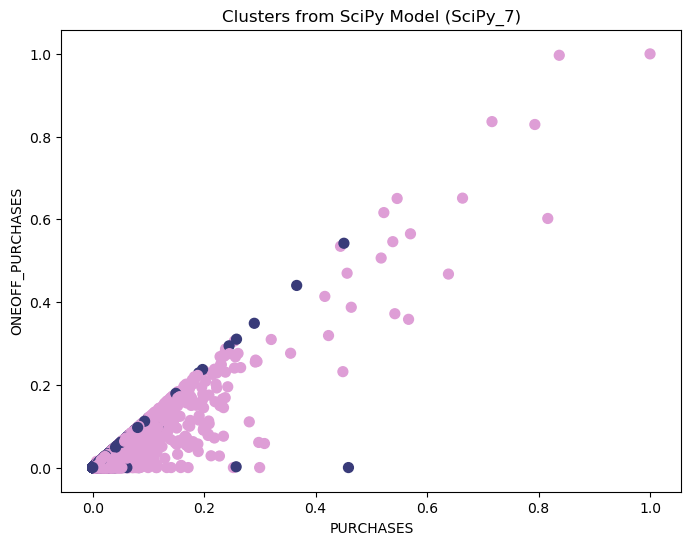

In [13]:
# a.  Choose a pair of features and generate a scatter plot of the data, 
#     coloring points according to the clusters assigned by your best model. 

# I used the columns from the heatmap observation to visualize the positive correlation
# Choose the index of the best model (e.g., index 7 for SciPy_7)
best_index = 7
cluster_labels = scipy_clusters[best_index]
# Print count of values in each cluster to confirm correct model usage:
print("Unique labels:", np.unique(cluster_labels))
print(pd.Series(cluster_labels).value_counts())

plt.figure(figsize=(8, 6))
plt.scatter(scaled_df["PURCHASES"], scaled_df["ONEOFF_PURCHASES"], c=cluster_labels, s=50, cmap='tab20b')
plt.title("Clusters from SciPy Model (SciPy_7)")
plt.xlabel("PURCHASES")
plt.ylabel("ONEOFF_PURCHASES")
plt.show()

In [14]:
# Comment on the plot in Markdown.

**Explanation:**

As per the earlier heatmap observations, the correlation between the columns of PURCHASES and ONEOFF_PURCHASES appears to be strongly positive. However, the clusters don't appear to have generalized well. There appears to be some overlap in data points, and as such might not be the best clustering. This means that further analysis would be necessary to derive the best possible insights from this data. 

While SciPy Model 7 was selected as the best model due to its strong silhouette score and clear cluster separation, I also considered Sklearn Model 4 as a close runner-up. It produced three cluster with a similar distribution to the two-cluster model, but did not offer significantly better separation or insight. After reviewing the scatterplot, I concluded that the added complexity did not yield clearer groupings, so I opted for the simpler and more interpretable SciPy model.

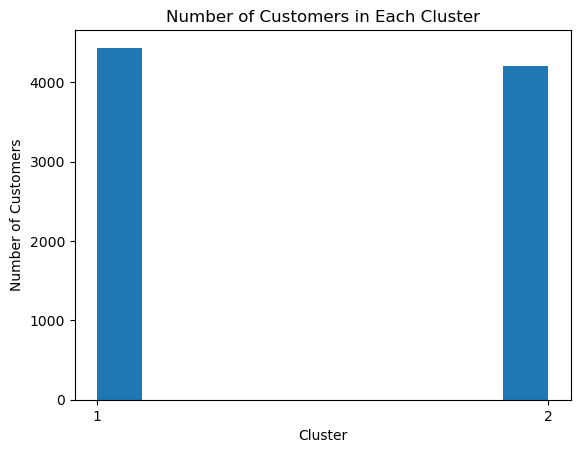

In [15]:
# b.  Generate a histogram showing the number of customers in each cluster.

plt.hist(x=cluster_labels)
plt.xticks([1,2])
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.title('Number of Customers in Each Cluster')
plt.show()

In [16]:
# Provide observations in Markdown, noting whether cluster sizes make sense.

**Explanation:**

From the 2.d explanation, I can see that the cluster sizes are as described as before. For example, cluster 1 contains 4435 data points, while cluster 2 contains 4201 data points. The histogram appears to reflect these descriptions.

In [17]:
# c. Create a separate DataFrame for each cluster and use pandas.DataFrame.describe to describe each group.

cluster_1 = scaled_df[cluster_labels == 1]
cluster_2 = scaled_df[cluster_labels == 2]

display(cluster_1.describe())
display(cluster_2.describe())

BALANCE  BALANCE_FREQUENCY    PURCHASES  ONEOFF_PURCHASES  \
count  4435.000000        4435.000000  4435.000000       4435.000000   
mean      0.092209           0.844908     0.005638          0.004924   
std       0.109960           0.250974     0.017189          0.017739   
min       0.000000           0.000000     0.000000          0.000000   
25%       0.012385           0.727273     0.000000          0.000000   
50%       0.057973           1.000000     0.001020          0.000000   
75%       0.122987           1.000000     0.005885          0.003789   
max       0.856208           1.000000     0.458813          0.542225   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             4435.000000   4435.000000          4435.000000   
mean                 0.003378      0.028855             0.143944   
std                  0.019318      0.048264             0.175296   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.000000   
50%                  0.000000      0.008285             0.083333   
75%                  0.001425      0.038671             0.250000   
max                  1.000000      0.555698             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 4435.000000                       4435.000000   
mean                     0.064784                          0.076039   
std                      0.101469                          0.147149   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.000000                          0.000000   
75%                      0.083333                          0.083333   
max                      0.583333                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             4435.000000       4435.000000    4435.000000   4435.000000   
mean                 0.124962          0.036205       0.007104      0.137476   
std                  0.141817          0.062074       0.010783      0.113044   
min                  0.000000          0.000000       0.000000      0.000000   
25%                  0.000000          0.000000       0.000000      0.048414   
50%                  0.066667          0.016260       0.002793      0.098497   
75%                  0.190476          0.048780       0.011173      0.198664   
max                  1.000000          1.000000       0.114525      0.766277   

          PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count  4435.000000      4.435000e+03       4435.000000  4435.000000  
mean      0.029970      1.124752e-02          0.075797     0.921421  
std       0.051293      2.855011e-02          0.200638     0.214190  
min       0.000000      2.431871e-07          0.000000     0.000000  
25%       0.006914      2.295628e-03          0.000000     1.000000  
50%       0.014014      4.989820e-03          0.000000     1.000000  
75%       0.031700      1.102061e-02          0.000000     1.000000  
max       1.000000      7.987782e-01          1.000000     1.000000

BALANCE  BALANCE_FREQUENCY    PURCHASES  ONEOFF_PURCHASES  \
count  4201.000000        4201.000000  4201.000000       4201.000000   
mean      0.075506           0.947954     0.037033          0.025309   
std       0.109492           0.129376     0.056540          0.054450   
min       0.000000           0.000000     0.000171          0.000000   
25%       0.005963           1.000000     0.009581          0.000000   
50%       0.032378           1.000000     0.020685          0.008611   
75%       0.097730           1.000000     0.044040          0.030271   
max       1.000000           1.000000     1.000000          1.000000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             4201.000000   4201.000000          4201.000000   
mean                 0.034884      0.012894             0.867665   
std                  0.050129      0.039678             0.171936   
min                  0.000000      0.000000             0.250000   
25%                  0.008489      0.000000             0.750000   
50%                  0.020173      0.000000             1.000000   
75%                  0.043686      0.004791             1.000000   
max                  0.688764      1.000000             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 4201.000000                       4201.000000   
mean                     0.354894                          0.677910   
std                      0.361939                          0.341888   
min                      0.000000                          0.000000   
25%                      0.000000                          0.500000   
50%                      0.250000                          0.800000   
75%                      0.666667                          1.000000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             4201.000000       4201.000000    4201.000000   4201.000000   
mean                 0.056659          0.017164       0.078824      0.161821   
std                  0.116528          0.047321       0.086060      0.129981   
min                  0.000000          0.000000       0.000000      0.008347   
25%                  0.000000          0.000000       0.033520      0.058431   
50%                  0.000000          0.000000       0.050279      0.131886   
75%                  0.055555          0.008130       0.092179      0.232053   
max                  0.666667          1.000000       1.000000      1.000000   

          PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count  4201.000000       4201.000000       4201.000000  4201.000000  
mean      0.040682          0.011380          0.247462     0.923431  
std       0.062689          0.033494          0.350469     0.222975  
min       0.000322          0.000000          0.000000     0.000000  
25%       0.010342          0.002178          0.000000     1.000000  
50%       0.022498          0.003037          0.000000     1.000000  
75%       0.045877          0.010532          0.444444     1.000000  
max       0.925261          1.000000          1.000000     1.000000

In [18]:
# d.  Provide a written conclusion summarizing each customer group for the marketing team, based on the summary statistics. 
#     Include actionable recommendations derived from the characteristics of each cluster.

**Explanation:**
<pre>
Cluster 1 (Lower Engagement Customers):
These customers tend to have lower credit limits, lower purchase frequency, and generally lower values across most features. They may represent less active or risk-averse users.

Recommendation: Target this group with incentives to increase engagement â€” such as cashback offers, low-interest installment plans, or personalized promotions based on spending history.


Cluster 2 (Higher Engagement Customers):
This group shows higher purchase activity, higher credit limits, and more frequent use of one-off and installment purchases. They are likely more engaged and responsive to premium services.

Recommendation: Offer loyalty programs, travel rewards, or credit limit increases. Consider upselling financial products like personal loans or investment accounts.
</pre>